In [ ]:
# Install the TextBlob package (needed for sentiment analysis)
!pip install textblob

# Import important Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving college_event_feedback.csv to college_event_feedback.csv


In [ ]:
# Load the uploaded CSV into a pandas DataFrame
df = pd.read_csv("college_event_feedback.csv")

# View the first few rows
df.head()


,Student_ID,Event_Name,Rating,Feedback
0,S1000,Tech Fest,5,Door stage just although development road forget.
1,S1001,Startup Meetup,1,Never character west standard policy let decad...
2,S1002,Startup Meetup,5,Quality increase face card shake right line ab...
3,S1003,Workshop on AI,4,Support big window when leave attorney explain...
4,S1004,Finance Summit,4,Anything ten nature cup capital strategy.


In [ ]:
# Check for empty (null) values
df.isnull().sum()

# Remove empty rows if any
df.dropna(inplace=True)

# Remove extra spaces from feedback
df['Feedback'] = df['Feedback'].str.strip()

# Ensure ratings are numeric
df['Rating'] = pd.to_numeric(df['Rating'])


In [ ]:
# Analyze sentiment polarity using TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment scoring
df['Sentiment_Score'] = df['Feedback'].apply(get_sentiment)

# Label the sentiment as Positive, Negative, or Neutral
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Score'].apply(label_sentiment)

# Show results
df[['Feedback', 'Sentiment_Score', 'Sentiment_Label']].head()


,Feedback,Sentiment_Score,Sentiment_Label
0,Door stage just although development road forget.,0.000000,Neutral
1,Never character west standard policy let decad...,-0.233333,Negative
2,Quality increase face card shake right line ab...,-0.016071,Neutral
3,Support big window when leave attorney explain...,0.208333,Positive
4,Anything ten nature cup capital strategy.,0.000000,Neutral


/tmp/ipython-input-2129162375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Event_Name', y='Rating', palette='Blues')


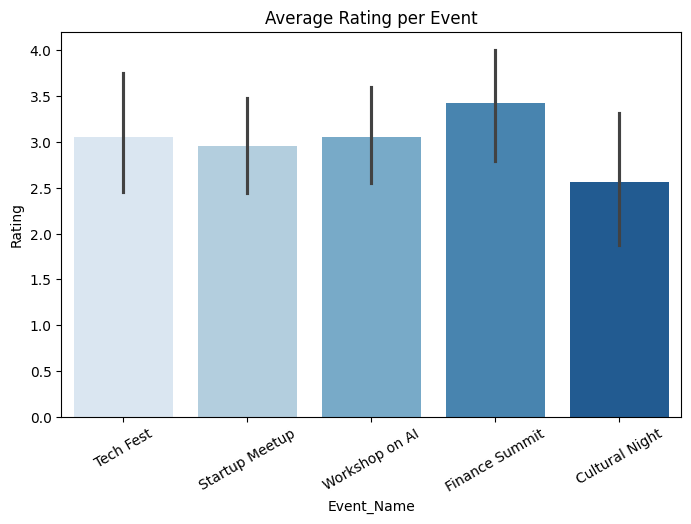

In [ ]:
# Bar Chart: Average Rating per Event
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Event_Name', y='Rating', palette='Blues')
plt.title('Average Rating per Event')
plt.xticks(rotation=30)
plt.show()


/tmp/ipython-input-1466136652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment_Label', palette='Set2')


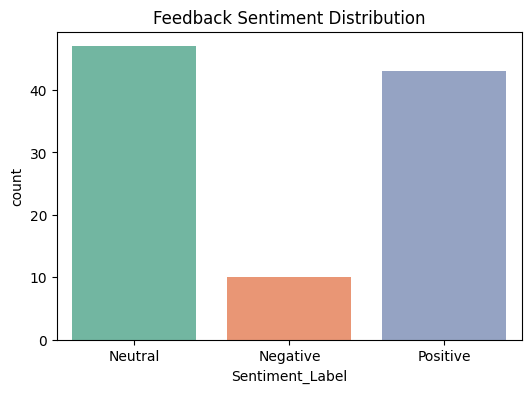

In [ ]:
# Countplot of Sentiment Labels
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment_Label', palette='Set2')
plt.title("Feedback Sentiment Distribution")
plt.show()


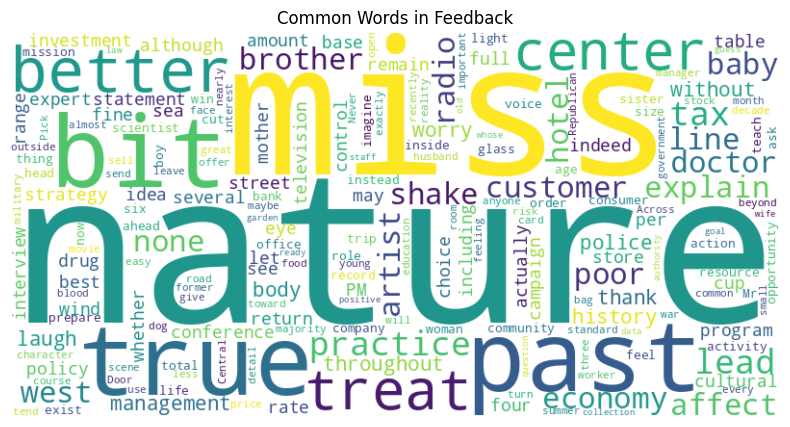

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

# Combine all feedback into one big string
text = " ".join(df['Feedback'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Feedback")
plt.show()


In [ ]:
# Save final result with sentiment labels
df.to_csv("event_feedback_with_sentiment.csv", index=False)

# Download the file
files.download("event_feedback_with_sentiment.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>